<a href="https://colab.research.google.com/github/EmmillyDias/planessence-business-diagnosis/blob/main/analise_confeitaria_tudo_com_amor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Analise de interesse dos clientes da Confeitaria Tudo Com Amor**

Objetivo do projeto: Identificar padrões e insights que podem direcionar o posicionamento da empresa dentro do mercado de confeitaria na cidade de Paragominas no Pará.
O projeto é essencialmente qualitativo exploratório, voltado para identificar padrões de comportamento e preferências dos clientes da confeitaria Tudo com Amor.

In [ ]:
#Preparar o ambiente
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from glob import glob
import os

In [ ]:
#Buscar todos os arquivos que começam com 'cliente''
csv_files=glob('cliente_*.csv')
print ("Arquivo encontrados:")
for f in csv_files:
  print (f)

Arquivo encontrados:
cliente_maio.csv
cliente_junho.csv
cliente_marco.csv
cliente_fevereiro.csv
cliente_abril.csv


In [ ]:
#Ler e unir tudo
dfs=[pd.read_csv(f) for f in csv_files]
df=pd.concat(dfs,ignore_index=True)

In [ ]:
#Conferir se deu certo
print ("Total de linhas:", len(df))
df.head(10)

Total de linhas: 35


,Nome do cliente,Data da entrega,Delivery com taxa,Forma de pagamento,Objetivo do pedido,Produto,Recheio,Status,Status de entrega,Valor da encomenda
0,Maria Eduarda Moraes,3 de maio de 2024 19:00 (BRT),Delivery,Pix,Comemoracao surpresa,Bolo Bentô,Chocolate trufado,Pago!,Entregue,"R$ 75,00"
1,René Ferreira,10 de maio de 2024,Não delivery,Pix,Aniversario surpresa,Bolo 15cm,Banoffe,Pago!,Entregue,"R$ 90,00"
2,Tatiane,19 de maio de 2024,Delivery,Dinheiro,Aniversario,Bolo 15cm,"Beijinho, Chocolate trufado",Pago!,Entregue,"R$ 100,00"
3,Luciana,27 de maio de 2024,Delivery,Pix,Aniversario surpresa,Bolo Bentô,Chocolate trufado,Pago!,Entregue,"R$ 50,00"
4,Aline Martins,28 de maio de 2024,Não delivery,Pix,Aniversario,Bolo 15cm,Beijinho,Pago!,Entregue,"R$ 90,00"
5,Andreia,29 de maio de 2024,Não delivery,Pix,Aniversario,Docinhos,"Beijinho, Brigadeiro",Pago!,Entregue,"R$ 45,00"
6,Marcela,30 de maio de 2024,Delivery,Dinheiro,Aniversario,Bolo 15cm,Chocolate trufado,Pago!,Entregue,"R$ 160,00"
7,Gisele,4 de junho de 2024,Não delivery,Dinheiro,Aniversario,Bolo 15cm,"Chocolate trufado, Ninho trufado",Não pago,Não iniciada,"R$ 90,00"
8,Janaina,5 de junho de 2024,Delivery,Pix,Evento,Sobremesa,Tiramisu,Não pago,Não iniciada,"R$ 90,00"
9,Janaina,5 de junho de 2024,Delivery,Pix,Evento,Bolo no pote,"Amendoim, Beijinho, Chocolate trufado, Creme d...",Não pago,Não iniciada,"R$ 660,00"


In [ ]:
#Verificar se há valores ausentes
df.isnull().sum()

,0
Nome do cliente,0
Data da entrega,0
Delivery com taxa,0
Forma de pagamento,0
Objetivo do pedido,0
Produto,0
Recheio,0
Status,0
Status de entrega,0
Valor da encomenda,0


In [ ]:
# Conferir colunas categóricas (tipo texto)
for col in df.select_dtypes(include='object').columns:
    print(f"\nColuna: {col}")
    print(df[col].value_counts().head(10))


Coluna: Nome do cliente
Nome do cliente
Marcela                  2
Janaina                  2
Janaina                  2
Maria Eduarda Moraes     1
Luciana                  1
Aline Martins            1
Tatiane                  1
René Ferreira            1
Gisele                   1
Andreia                  1
Name: count, dtype: int64

Coluna: Data da entrega 
Data da entrega 
5 de junho de 2024                     2
6 de junho de 2024                     2
12 de junho de 2024                    2
19 de fevereiro de 2024 18:00 (BRT)    2
10 de abril de 2024                    2
19 de maio de 2024                     1
29 de maio de 2024                     1
28 de maio de 2024                     1
27 de maio de 2024                     1
4 de junho de 2024                     1
Name: count, dtype: int64

Coluna: Delivery com taxa
Delivery com taxa
Delivery        19
Não delivery    16
Name: count, dtype: int64

Coluna: Forma de pagamento
Forma de pagamento
Pix         29
Dinheiro     

In [ ]:
# Conferir as colunas principais de interesse
colunas_interesse = ["Objetivo do pedido", "Produto", "Recheio"]  # substitua pelos nomes exatos das colunas

In [ ]:
# Analisar as categorias mais frequentes em cada coluna
for col in colunas_interesse:
    print(f"\nColuna: {col}")
    print(df[col].value_counts().head(10))


Coluna: Objetivo do pedido
Objetivo do pedido
Aniversario             14
Comemoracao surpresa    11
Aniversario surpresa     7
Evento                   3
Name: count, dtype: int64

Coluna: Produto
Produto
Bolo Bentô      13
Bolo 15cm       11
Docinhos         4
Bolo 25cm        3
Sobremesa        2
Bolo no pote     1
Bolo 20cm        1
Name: count, dtype: int64

Coluna: Recheio
Recheio
Chocolate trufado                                                           9
Chocolate trufado, Ninho trufado                                            6
Creme de abacaxi, Creme de ameixa                                           3
Beijinho, Brigadeiro                                                        2
Beijinho, Chocolate trufado                                                 2
Banoffe                                                                     1
Tiramisu                                                                    1
Amendoim, Beijinho, Chocolate trufado, Creme de abacaxi, Creme d

/tmp/ipython-input-1982646790.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col], order=df[col].value_counts().index[:10], palette="mako")


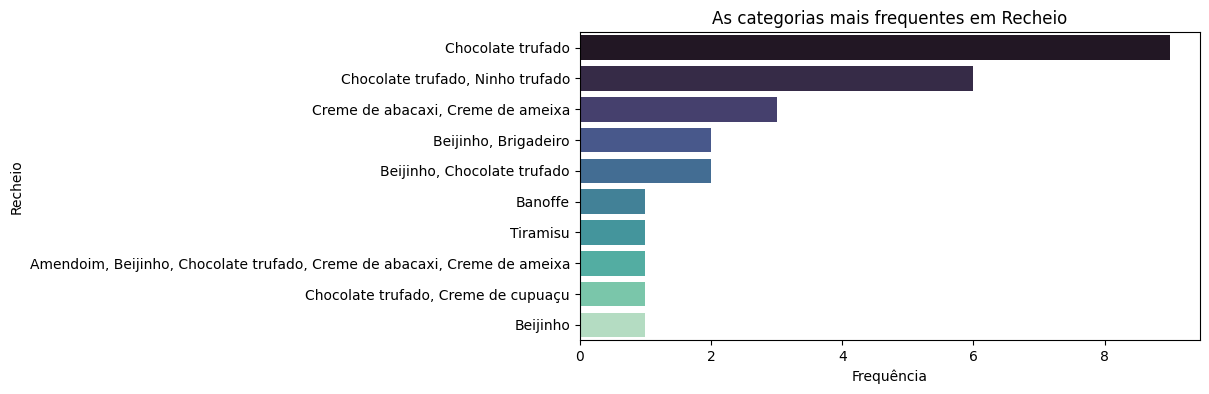

In [ ]:
    # mostra as 10 categorias mais comuns
    plt.figure(figsize=(8,4))
    sns.countplot(y=df[col], order=df[col].value_counts().index[:10], palette="mako")
    plt.title(f"As categorias mais frequentes em {col}")
    plt.xlabel("Frequência")
    plt.ylabel(col)
    plt.show()

In [ ]:
# Cruzar categorias: Produto x Objetivo do pedido
pd.crosstab(df["Produto"], df["Objetivo do pedido"]).head(10)

Objetivo do pedido,Aniversario,Aniversario surpresa,Comemoracao surpresa,Evento
Produto,,,,
Bolo 15cm,8,3,0,0
Bolo 20cm,1,0,0,0
Bolo 25cm,2,0,1,0
Bolo Bentô,1,4,8,0
Bolo no pote,0,0,0,1
Docinhos,2,0,2,0
Sobremesa,0,0,0,2


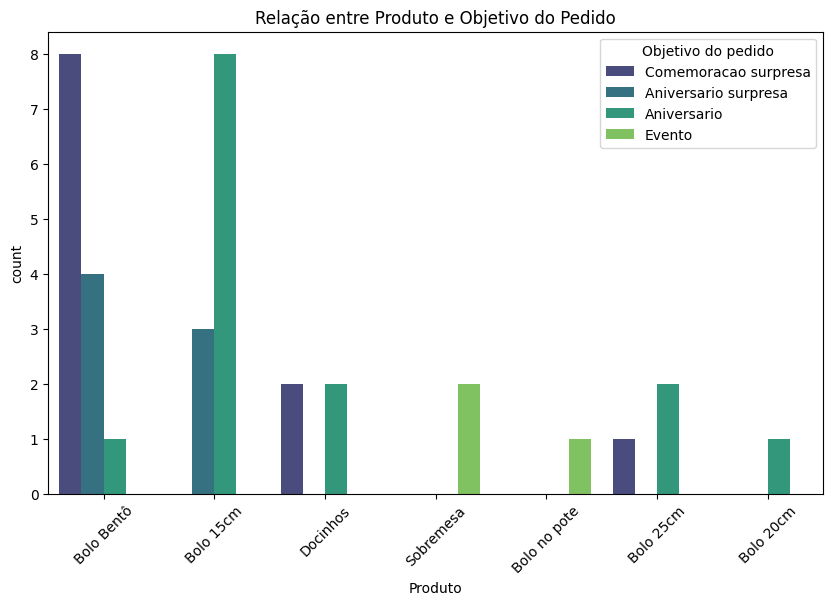

In [ ]:
#Para visualizar
plt.figure(figsize=(10,6))
sns.countplot(data=df, x="Produto", hue="Objetivo do pedido", palette="viridis")
plt.title("Relação entre Produto e Objetivo do Pedido")
plt.xticks(rotation=45)
plt.show()